# Подготовка окружения и конфигурации

In [1]:
import torch
import matplotlib.pyplot as plt

from utils import train, MultimodalModel, get_loaders
from dataset import MultimodalDataset, get_transforms

In [3]:
class Config:
    # для воспроизводимости
    SEED = 42

    # Модели
    TEXT_MODEL_NAME = "bert-base-uncased"
    IMAGE_MODEL_NAME = "tf_efficientnet_b0"

    # Какие слои размораживаем - совпадают с нэймингом в моделях
    #TEXT_MODEL_UNFREEZE = "encoder.layer.11|pooler"
    #IMAGE_MODEL_UNFREEZE = "blocks.6|conv_head|bn2"
    # TEXT_MODEL_UNFREEZE = ""
    IMAGE_MODEL_UNFREEZE = ""

    NUM_INGR = ""
    EMB_INGR = 32

    MASS_MEAN = ""
    MASS_STD = ""
    
    # Гиперпараметры
    # BATCH_SIZE = 256
    BATCH_SIZE = 64
    IMAGE_LR = 1e-4
    EMB_INGR_LR = 1e-3
    CLASSIFIER_LR = 1e-3
    EPOCHS = 30
    DROPOUT = 0.3
    HUBER_DELTA=30.0
    WEIGHT_DECAY=5e-4

    # Пути
    DF_PATH = "data/dish.csv"
    IMG_PATH = "data/images/"
    SAVE_PATH = "best_model.pth"

cfg = Config()
device = "cuda" if torch.cuda.is_available() else "cpu"
print('device: ', device)

device:  cuda


In [3]:
transforms = get_transforms(cfg)

# Пример инстанса данных тестового сета

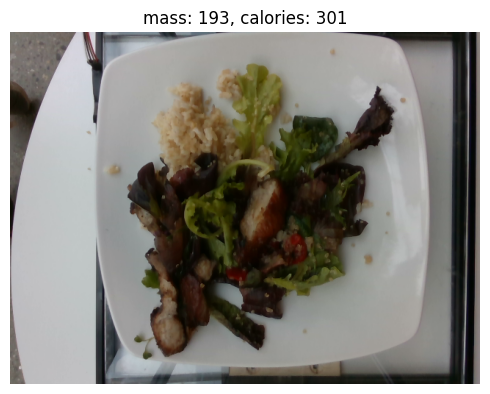

ingridients:  tensor([164,  67,  21, 179,  59,  19,  87,  45,  24, 117, 109, 175,  80, 152,
        180, 113, 168])


In [4]:
ds = MultimodalDataset(cfg, transforms, ds_type="test", initial_img=True)
item = ds[0]
initial_image = item["initial_image"]

plt.figure(figsize=(5, 5)) 

plt.imshow(initial_image)
plt.title(f'mass: {item["initital_mass"]:.0f}, calories: {item["label"]:.0f}')
plt.axis('off')
plt.tight_layout()
plt.show()
print("ingridients: ", item["ingr_idxs"])
# del ds

params to train: 359,265


  val epoch 1  : 100%|██████████| 8/8 [00:07<00:00,  1.05it/s, last batch loss=3550.4, last batch mae=133.0]


total epoch 1   train loss 6114.8, val loss 4663.7 train mae 218.1, val mae 169.9
----------------------------------------
New best model, epoch: 1
----------------------------------------


  val epoch 2  : 100%|██████████| 8/8 [00:07<00:00,  1.07it/s, last batch loss=2548.4, last batch mae=99.1] 


total epoch 2   train loss 3905.7, val loss 3784.4 train mae 144.2, val mae 140.2
----------------------------------------
New best model, epoch: 2
----------------------------------------


  val epoch 3  : 100%|██████████| 8/8 [00:07<00:00,  1.03it/s, last batch loss=2211.4, last batch mae=87.6] 


total epoch 3   train loss 3236.2, val loss 3270.4 train mae 121.8, val mae 123.1
----------------------------------------
New best model, epoch: 3
----------------------------------------


  val epoch 4  : 100%|██████████| 8/8 [00:07<00:00,  1.03it/s, last batch loss=2101.7, last batch mae=84.5] 


total epoch 4   train loss 2807.1, val loss 2875.6 train mae 107.3, val mae 109.8
----------------------------------------
New best model, epoch: 4
----------------------------------------


  val epoch 5  : 100%|██████████| 8/8 [00:07<00:00,  1.08it/s, last batch loss=1919.1, last batch mae=77.7] 


total epoch 5   train loss 2568.8, val loss 2620.3 train mae 99.2, val mae 100.9
----------------------------------------
New best model, epoch: 5
----------------------------------------


  val epoch 6  : 100%|██████████| 8/8 [00:07<00:00,  1.08it/s, last batch loss=1817.7, last batch mae=74.2] 


total epoch 6   train loss 2400.2, val loss 2417.9 train mae 93.3, val mae 93.8
----------------------------------------
New best model, epoch: 6
----------------------------------------


  val epoch 7  : 100%|██████████| 8/8 [00:07<00:00,  1.08it/s, last batch loss=1609.0, last batch mae=66.2] 


total epoch 7   train loss 2225.1, val loss 2229.4 train mae 87.3, val mae 87.2
----------------------------------------
New best model, epoch: 7
----------------------------------------


  val epoch 8  : 100%|██████████| 8/8 [00:07<00:00,  1.08it/s, last batch loss=1485.5, last batch mae=62.3] 


total epoch 8   train loss 2112.1, val loss 2114.2 train mae 83.5, val mae 83.3
----------------------------------------
New best model, epoch: 8
----------------------------------------


  val epoch 9  : 100%|██████████| 8/8 [00:08<00:00,  1.12s/it, last batch loss=1497.2, last batch mae=62.8]


total epoch 9   train loss 1960.6, val loss 2018.8 train mae 78.4, val mae 80.4
----------------------------------------
New best model, epoch: 9
----------------------------------------



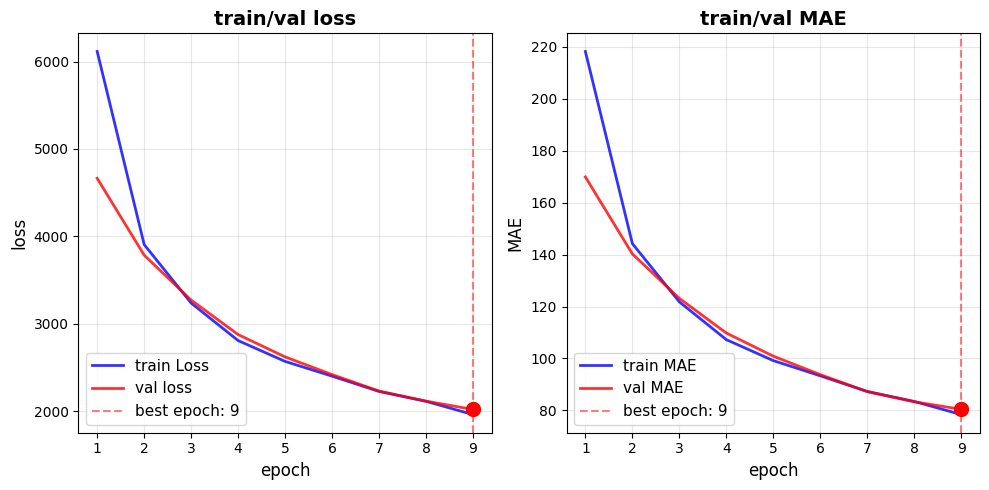


stat:
final train loss: 1960.6
final val loss:   2018.8
final train MAE:  78.4
final val MAE:    80.4

best val loss:  2018.8 (epoch 9)
best val MAE:     80.4 (epoch 9)



  val epoch 10 : 100%|██████████| 8/8 [00:07<00:00,  1.08it/s, last batch loss=1477.5, last batch mae=61.9]


total epoch 10  train loss 1886.5, val loss 1947.8 train mae 75.8, val mae 77.8
----------------------------------------
New best model, epoch: 10
----------------------------------------


  val epoch 11 : 100%|██████████| 8/8 [00:07<00:00,  1.09it/s, last batch loss=1367.4, last batch mae=58.8]


total epoch 11  train loss 1759.7, val loss 1890.8 train mae 71.5, val mae 75.7
----------------------------------------
New best model, epoch: 11
----------------------------------------


  val epoch 12 : 100%|██████████| 8/8 [00:07<00:00,  1.09it/s, last batch loss=1305.6, last batch mae=56.5]


total epoch 12  train loss 1673.1, val loss 1761.3 train mae 68.4, val mae 71.4
----------------------------------------
New best model, epoch: 12
----------------------------------------


  val epoch 13 : 100%|██████████| 8/8 [00:07<00:00,  1.09it/s, last batch loss=1330.0, last batch mae=57.0]


total epoch 13  train loss 1636.3, val loss 1737.5 train mae 67.2, val mae 70.5
----------------------------------------
New best model, epoch: 13
----------------------------------------


  val epoch 14 : 100%|██████████| 8/8 [00:07<00:00,  1.08it/s, last batch loss=1197.7, last batch mae=52.6]


total epoch 14  train loss 1539.6, val loss 1685.8 train mae 63.8, val mae 68.7
----------------------------------------
New best model, epoch: 14
----------------------------------------


  val epoch 15 : 100%|██████████| 8/8 [00:07<00:00,  1.08it/s, last batch loss=1164.6, last batch mae=51.6]


total epoch 15  train loss 1495.3, val loss 1587.4 train mae 62.2, val mae 65.3
----------------------------------------
New best model, epoch: 15
----------------------------------------


  val epoch 16 : 100%|██████████| 8/8 [00:07<00:00,  1.08it/s, last batch loss=1172.4, last batch mae=51.9]


total epoch 16  train loss 1430.3, val loss 1596.3 train mae 60.1, val mae 65.5
----------------------------------------


  val epoch 17 : 100%|██████████| 8/8 [00:07<00:00,  1.08it/s, last batch loss=1082.2, last batch mae=48.6]


total epoch 17  train loss 1415.7, val loss 1534.4 train mae 59.5, val mae 63.2
----------------------------------------
New best model, epoch: 17
----------------------------------------


  val epoch 18 : 100%|██████████| 8/8 [00:07<00:00,  1.07it/s, last batch loss=981.6, last batch mae=44.7] 


total epoch 18  train loss 1381.0, val loss 1441.1 train mae 58.2, val mae 60.2
----------------------------------------
New best model, epoch: 18
----------------------------------------



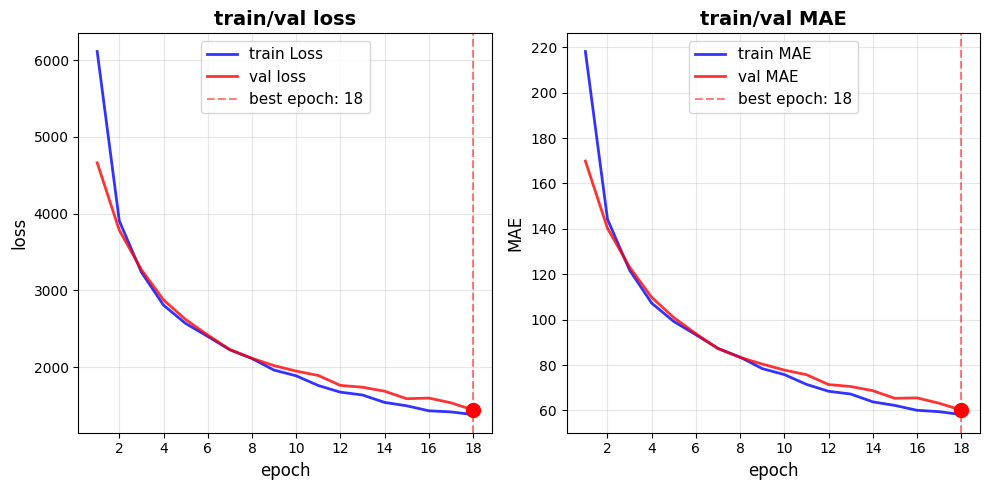


stat:
final train loss: 1381.0
final val loss:   1441.1
final train MAE:  58.2
final val MAE:    60.2

best val loss:  1441.1 (epoch 18)
best val MAE:     60.2 (epoch 18)



  val epoch 19 : 100%|██████████| 8/8 [00:07<00:00,  1.10it/s, last batch loss=946.3, last batch mae=42.6] 


total epoch 19  train loss 1346.2, val loss 1431.4 train mae 57.0, val mae 59.7
----------------------------------------
New best model, epoch: 19
----------------------------------------


  val epoch 20 : 100%|██████████| 8/8 [00:07<00:00,  1.07it/s, last batch loss=1026.9, last batch mae=45.8]


total epoch 20  train loss 1337.6, val loss 1480.3 train mae 56.7, val mae 61.6
----------------------------------------


  val epoch 21 : 100%|██████████| 8/8 [00:07<00:00,  1.06it/s, last batch loss=931.4, last batch mae=42.6] 


total epoch 21  train loss 1255.5, val loss 1375.0 train mae 54.0, val mae 57.9
----------------------------------------
New best model, epoch: 21
----------------------------------------


  val epoch 22 : 100%|██████████| 8/8 [00:07<00:00,  1.07it/s, last batch loss=1012.0, last batch mae=45.3]


total epoch 22  train loss 1243.3, val loss 1467.1 train mae 53.5, val mae 61.2
----------------------------------------


  val epoch 23 : 100%|██████████| 8/8 [00:07<00:00,  1.03it/s, last batch loss=876.6, last batch mae=40.8] 


total epoch 23  train loss 1262.4, val loss 1381.9 train mae 54.2, val mae 58.0
----------------------------------------


  val epoch 24 : 100%|██████████| 8/8 [00:07<00:00,  1.04it/s, last batch loss=901.5, last batch mae=41.9] 


total epoch 24  train loss 1250.0, val loss 1390.7 train mae 53.7, val mae 58.3
----------------------------------------


  val epoch 25 : 100%|██████████| 8/8 [00:07<00:00,  1.08it/s, last batch loss=945.2, last batch mae=42.7] 


total epoch 25  train loss 1199.6, val loss 1380.8 train mae 52.0, val mae 57.9
----------------------------------------


  val epoch 26 : 100%|██████████| 8/8 [00:07<00:00,  1.09it/s, last batch loss=812.4, last batch mae=38.7] 


total epoch 26  train loss 1185.3, val loss 1320.8 train mae 51.6, val mae 56.0
----------------------------------------
New best model, epoch: 26
----------------------------------------


  val epoch 27 : 100%|██████████| 8/8 [00:07<00:00,  1.07it/s, last batch loss=846.6, last batch mae=40.1] 


total epoch 27  train loss 1157.0, val loss 1292.0 train mae 50.6, val mae 54.9
----------------------------------------
New best model, epoch: 27
----------------------------------------



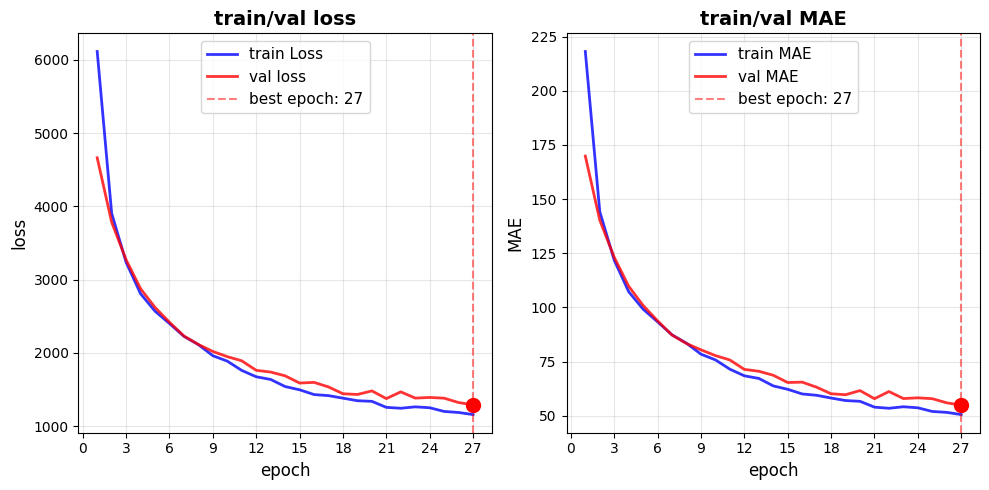


stat:
final train loss: 1157.0
final val loss:   1292.0
final train MAE:  50.6
final val MAE:    54.9

best val loss:  1292.0 (epoch 27)
best val MAE:     54.9 (epoch 27)



  val epoch 28 : 100%|██████████| 8/8 [00:08<00:00,  1.12s/it, last batch loss=838.4, last batch mae=38.9] 


total epoch 28  train loss 1157.5, val loss 1332.5 train mae 50.4, val mae 56.0
----------------------------------------


  val epoch 29 : 100%|██████████| 8/8 [00:07<00:00,  1.07it/s, last batch loss=896.6, last batch mae=40.9] 


total epoch 29  train loss 1139.4, val loss 1304.7 train mae 49.8, val mae 55.2
----------------------------------------


  val epoch 30 : 100%|██████████| 8/8 [00:07<00:00,  1.07it/s, last batch loss=745.0, last batch mae=35.3] 

total epoch 30  train loss 1116.6, val loss 1236.8 train mae 49.0, val mae 53.0
----------------------------------------
New best model, epoch: 30
----------------------------------------


In [5]:
train_loss_stat, val_loss_stat, train_mae_stat, val_mae_stat = train(cfg, device)

In [52]:
_, val_loader = get_loaders(cfg)
model = MultimodalModel(cfg)
model.load_state_dict(torch.load(cfg.SAVE_PATH,  map_location=device))
model.to(device) 
model.eval()
img_paths =[]
masses=[]
predictions = []
targets = []
with torch.no_grad():
    for batch in val_loader:
        inputs = {
                'image': batch['image'].to(device),
                'ingr_idxs': batch['ingr_idxs'].to(device),
                'mass': batch['mass'].to(device)
        }
        img_path = batch['img_path']
        labels = batch["label"]

        preds = model(**inputs)
        
        img_paths.extend(img_path)
        masses.extend(batch['mass'].tolist())
        predictions.extend(preds.cpu().tolist())
        targets.extend(labels.tolist())
data = list(zip(img_paths, masses, predictions, targets))

In [ ]:
import pandas as pd
df = pd.DataFrame(data, columns=['img', 'mass', 'pred', 'target'])
df['mae'] = abs(df['pred'] - df['target'])
df = df.sort_values(by='mae', ascending=False)[:5]


,img,mass,pred,target,mae
141,data/images/dish_1565811139/rgb.png,416.0,317.045227,902.200012,585.154785
298,data/images/dish_1558549806/rgb.png,203.0,430.262665,781.958008,351.695343
88,data/images/dish_1563478751/rgb.png,545.0,614.898743,950.395081,335.496338
13,data/images/dish_1558720236/rgb.png,407.0,565.916870,887.823059,321.906189
170,data/images/dish_1566501594/rgb.png,109.0,192.795441,508.048981,315.253540
